In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Importing the datasets required for Q2

In [2]:
planes = pd.read_csv("C:/Users/94772/OneDrive/Documents/Programming for Data Science coursework/datasets/plane-data.csv")
cleaned_dataset = pd.read_csv("C:/Users/94772/OneDrive/Documents/PROG CW - final/cleaned_dataset.csv")

## select 'tailnum' and 'year' columns from the planes dataframe

In [3]:
planes = planes.loc[:, ['tailnum', 'year']]
planes['year'] = pd.to_numeric(planes['year'], errors='coerce')
planes

,tailnum,year
0,N050AA,NaN
1,N051AA,NaN
2,N052AA,NaN
3,N054AA,NaN
4,N055AA,NaN
...,...,...
5024,N997DL,1992.0
5025,N998AT,2002.0
5026,N998DL,1992.0
5027,N999CA,1998.0


## Removing rows with NaN values

In [4]:
planes = planes.dropna()
planes

,tailnum,year
34,N10156,2004.0
35,N102UW,1998.0
36,N10323,1986.0
37,N103US,1999.0
38,N104UA,1998.0
...,...,...
5024,N997DL,1992.0
5025,N998AT,2002.0
5026,N998DL,1992.0
5027,N999CA,1998.0


## Changing 'tailnum' to 'TailNum'

In [5]:
planes = planes.rename(columns={'tailnum':'TailNum'})

## Merge the plane data with the cleaned dataset

In [6]:
merged_df = pd.merge(cleaned_dataset, planes, on='TailNum', how='inner')


## Changing 'year' to 'YearOfManufacture'

In [7]:
merged_df = merged_df.rename(columns={"year": "YearOfManufacture"}) 
merged_df["YearOfManufacture"] = merged_df["YearOfManufacture"].astype('int64')

## Calculate the age of each plane and add a new column to the dataframe

In [8]:
merged_df['plane_age'] = merged_df['Year'] - merged_df['YearOfManufacture']
merged_df

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,...,Cancelled,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay,Total_Delay,YearOfManufacture,plane_age
0,2006,1,11,3,743.0,745,1024.0,1018,US,343,...,0,0,0,0,0,0,0,4.0,1999,7
1,2006,1,11,3,1913.0,1912,2326.0,2331,US,9,...,0,0,0,0,0,0,0,-4.0,1999,7
2,2006,1,12,4,2355.0,2359,121.0,131,US,374,...,0,0,0,0,0,0,0,-14.0,1999,7
3,2006,1,12,4,724.0,729,1017.0,1019,US,182,...,0,0,0,0,0,0,0,-7.0,1999,7
4,2006,1,12,4,1305.0,1300,1848.0,1850,US,570,...,0,0,0,0,0,0,0,3.0,1999,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11568522,2007,12,30,7,2003.0,2010,25.0,2345,B6,649,...,0,0,0,0,40,0,0,33.0,2007,0
11568523,2007,12,31,1,1943.0,1940,2120.0,2110,B6,5,...,0,0,0,0,0,0,0,13.0,2007,0
11568524,2007,12,31,1,1716.0,1720,1858.0,1901,B6,6,...,0,0,0,0,0,0,0,-7.0,2007,0
11568525,2007,12,31,1,2155.0,2150,59.0,100,B6,809,...,0,0,0,0,0,0,0,4.0,2007,0


## creating an array

In [9]:
planedata = merged_df[['Year','YearOfManufacture','plane_age','Total_Delay']]
planedata

,Year,YearOfManufacture,plane_age,Total_Delay
0,2006,1999,7,4.0
1,2006,1999,7,-4.0
2,2006,1999,7,-14.0
3,2006,1999,7,-7.0
4,2006,1999,7,3.0
...,...,...,...,...
11568522,2007,2007,0,33.0
11568523,2007,2007,0,13.0
11568524,2007,2007,0,-7.0
11568525,2007,2007,0,4.0


## Group the data by plane age and find the average of Total_Delay

In [10]:
bins = [0, 10, 20, 30, 40, 50, 60]
labels = ['0-10', '10-20', '20-30', '30-40', '40-50', '50-60']
planedata['age_range'] = pd.cut(planedata['plane_age'], bins=bins, labels=labels, include_lowest=True)

age_range = labels
Avgtotal_delay = []

for age in age_range:
    Avgtotal_delay.append(planedata[planedata['age_range']==age]['Total_Delay'].mean())

C:\Users\94772\AppData\Local\Temp\ipykernel_17744\3947124632.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  planedata['age_range'] = pd.cut(planedata['plane_age'], bins=bins, labels=labels, include_lowest=True)


## Create a table with plane age and average delay 

In [11]:
delay_df = pd.DataFrame({'AgeRange': age_range,
                         'Avgtotal_delay': Avgtotal_delay,})
print(delay_df)

  AgeRange  Avgtotal_delay
0     0-10       20.253386
1    10-20       20.735586
2    20-30       20.858119
3    30-40       19.058501
4    40-50       23.541351
5    50-60       27.556818


## Plot a bar chart to visualize the average delay by plane age

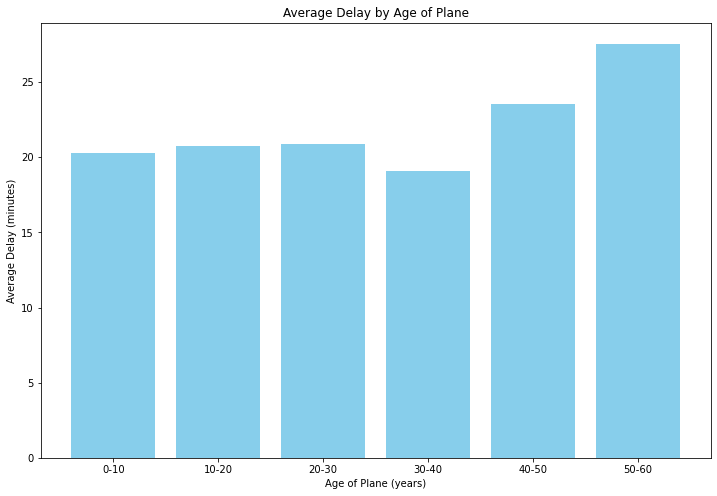

In [12]:
plt.figure(figsize=(12, 8))
plt.bar(delay_df['AgeRange'], delay_df['Avgtotal_delay'], color = '#87ceeb')
plt.xlabel('Age of Plane (years)')
plt.ylabel('Average Delay (minutes)')
plt.title('Average Delay by Age of Plane')
plt.show()

## creating a new column for Avgtotal_delay

In [13]:
agegrouped = planedata.groupby("plane_age")["Total_Delay"].mean().reset_index()
agegrouped = agegrouped.rename(columns={"Total_Delay" : "Avgtotal_delay"})
agegrouped

,plane_age,Avgtotal_delay
0,-1,19.385762
1,0,20.300605
2,1,20.125645
3,2,20.616260
4,3,20.231051
5,4,21.495242
6,5,19.251140
7,6,18.366003
8,7,19.767286
9,8,20.719034


## removing values of plane_age such as -1,2006,2007

In [14]:
agegrouped = agegrouped[~agegrouped["plane_age"].isin([-1,2006,2007])].copy()
agegrouped

,plane_age,Avgtotal_delay
1,0,20.300605
2,1,20.125645
3,2,20.616260
4,3,20.231051
5,4,21.495242
6,5,19.251140
7,6,18.366003
8,7,19.767286
9,8,20.719034
10,9,22.011121


## Regplot of Average Delay by Plane Age

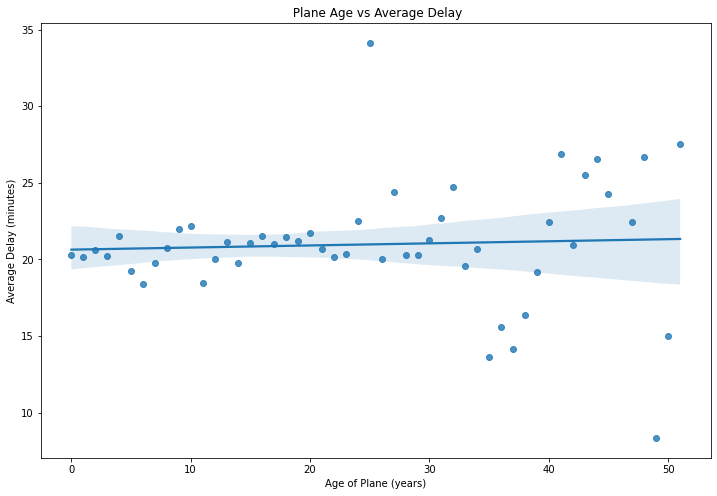

In [15]:
plt.figure(figsize=(12, 8))
sns.regplot(x='plane_age', y='Avgtotal_delay', data=agegrouped)
plt.title(' Plane Age vs Average Delay')
plt.xlabel('Age of Plane (years)')
plt.ylabel('Average Delay (minutes)')
plt.show()

## Check for correlation between plane age and Average total delay

In [16]:
agegrouped['plane_age'].corr(agegrouped['Avgtotal_delay'])

0.05247491499869942